## credit_card_example
- 신용카드 사기 검출 분류 실습용 데이터

### 데이터 읽기

In [6]:
import pandas as pd

data_path = './data/creditcard.csv'
raw_data = pd.read_csv(data_path)
raw_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### 총 데이터 28만개에서 사기인 횟수는 500개

In [9]:
raw_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
frauds_date = round(raw_data['Class'].value_counts()[1]/len(raw_data)*100, 2)
print(frauds_date)

0.17


/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


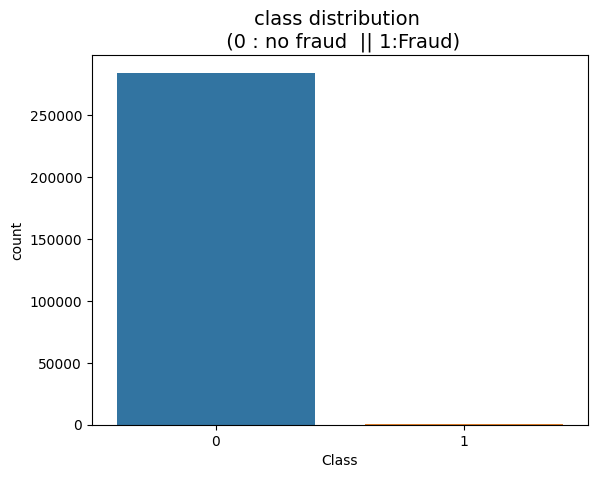

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x='Class', data=raw_data)
plt.title('class distribution \n (0 : no fraud  || 1:Fraud)', fontsize=14)
plt.show()

In [14]:
x = raw_data.iloc[:, 1:-1]
y = raw_data.iloc[:, -1]

x.shape, y.shape

((284807, 29), (284807,))

In [15]:
from sklearn.model_selection import train_test_split

train_dt, test_dt, train_lb, test_lb = train_test_split(x, y, test_size=0.3, 
                                                        random_state=13, stratify=y)

In [16]:
import numpy  as np

np.unique(train_lb, return_counts=True)

(array([0, 1]), array([199020,    344]))

In [17]:
tmp = np.unique(train_lb, return_counts=True)[1]
tmp[1]/len(train_lb) * 100

0.17254870488152324

In [18]:
tmp = np.unique(test_lb, return_counts=True)[1]
tmp[1]/len(test_lb) * 100

0.17321489179921118

### first trial

### 분류기의 성능을 return 하는 함수 하나 작성

In [19]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score)

def get_clf_eval(test_lb, pred):
    acc = accuracy_score(test_lb, pred)
    pre = precision_score(test_lb, pred)
    re = recall_score(test_lb, pred)
    f1 = f1_score(test_lb, pred)
    auc = roc_auc_score(test_lb, pred)

    return acc ,pre, re, f1, auc

### 성능 출력하는 함수 하나 작성

In [20]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(test_lb, pred):
    confusion = confusion_matrix(test_lb, pred)
    acc, pre, re, f1, auc = get_clf_eval(test_lb, pred)

    print("conf matrix")
    print(confusion)
    print('-------')

    print("accuracy : {0:.4f}, precision: {1:.4f}".format(acc, pre))
    print('recall: {0:.4f}, f1 : {1:.4f}, auc: {2:.4f}'.format(re, f1, auc))

### logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=13, solver='liblinear')
lr_clf.fit(train_dt, train_lb)
lr_pred = lr_clf.predict(test_dt)

print_clf_eval(test_lb, lr_pred)

conf matrix
[[85284    11]
 [   60    88]]
-------
accuracy : 0.9992, precision: 0.8889
recall: 0.5946, f1 : 0.7126, auc: 0.7972


### decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state= 13, max_depth=4)
dt_clf.fit(train_dt, train_lb)
dt_pred = dt_clf.predict(test_dt)

print_clf_eval(test_lb, dt_pred)

conf matrix
[[85281    14]
 [   42   106]]
-------
accuracy : 0.9993, precision: 0.8833
recall: 0.7162, f1 : 0.7910, auc: 0.8580


### random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(train_dt, train_lb)
rf_pred = rf_clf.predict(test_dt)

print_clf_eval(test_lb, rf_pred)

conf matrix
[[85290     5]
 [   38   110]]
-------
accuracy : 0.9995, precision: 0.9565
recall: 0.7432, f1 : 0.8365, auc: 0.8716



### 모델과 데이터를 주면 성능을 출력하는 함수 만들기

In [26]:
def get_result(model, train_dt, train_lb, test_dt, test_lb):
    model.fit(train_dt, train_lb)
    pred = model.predict(test_dt)

    return get_clf_eval(test_lb, pred)

In [27]:
def get_result_pd(models, model_names, train_dt, train_lb, test_dt, test_lb):
    col_names = ['accuracy','precision', 'recall', 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, train_dt, train_lb, test_dt, test_lb))
    
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

In [28]:
import time

models = [lr_clf, dt_clf, rf_clf]

model_names = ['lr', 'dt', 'rf']

start_time = time.time()
results = get_result_pd(models, model_names, train_dt, train_lb, test_dt, test_lb)

print('fit_time :', time.time() - start_time)

results

fit_time : 64.89820265769958


,accuracy,precision,recall,f1,roc_auc
lr,0.999169,0.888889,0.594595,0.712551,0.797233
dt,0.999345,0.883333,0.716216,0.791045,0.858026
rf,0.999497,0.956522,0.743243,0.836502,0.871592


### 2nd trial

/tmp/ipykernel_20329/251313334.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Amount'], color='r')
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

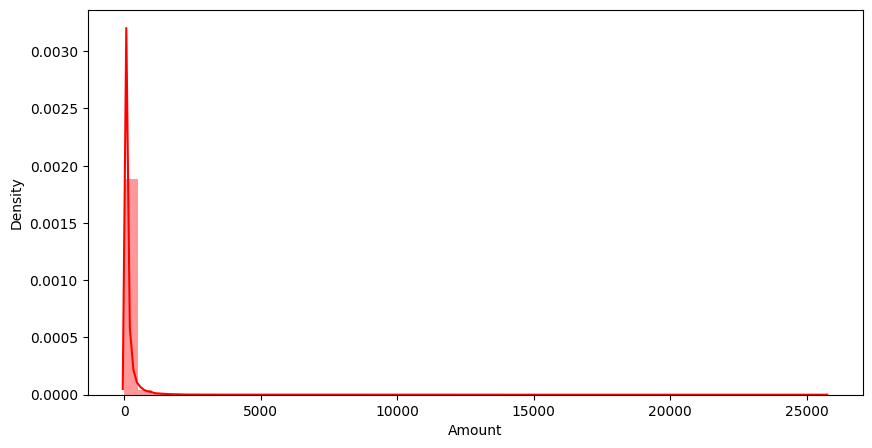

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['Amount'], color='r')

plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1,1))
raw_data_copy = raw_data.iloc[:, 1:-2]
raw_data_copy['Amount_scaled'] = amount_n

raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [32]:
train_dt, test_dt, train_lb, test_lb = train_test_split(raw_data_copy, y, test_size=0.3,
                                                        random_state=13, stratify=y)

In [33]:
models = [lr_clf, dt_clf, rf_clf]
model_names = ['lr', 'dt', 'rf']

start_time = time.time()
results = get_result_pd(models, model_names, train_dt, train_lb, test_dt, test_lb)

print('fit_time : ', time.time() - start_time)
results

fit_time :  59.04450964927673


,accuracy,precision,recall,f1,roc_auc
lr,0.999169,0.888889,0.594595,0.712551,0.797233
dt,0.999345,0.883333,0.716216,0.791045,0.858026
rf,0.999497,0.956522,0.743243,0.836502,0.871592


### 모델별 ROC 커브

LogisticRegression(random_state=13, solver='liblinear') lr
DecisionTreeClassifier(max_depth=4, random_state=13) dt
RandomForestClassifier(n_jobs=-1, random_state=13) rf


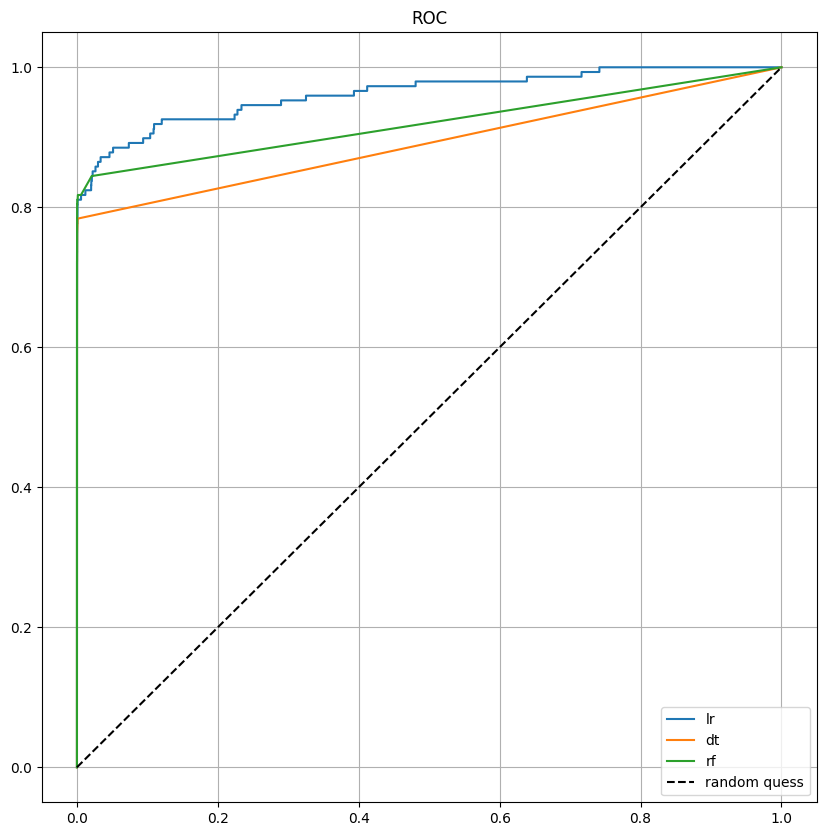

In [41]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, test_dt, test_lb):
    plt.figure(figsize=(10, 10))

    for model in range(len(models)):
        pred = models[model].predict_proba(test_dt)[:, 1]
        fpr, tpr, thresholds = roc_curve(test_lb, pred)
        plt.plot(fpr, tpr, label=model_names[model])
        print(models[model], model_names[model])
    
    plt.plot([0,1], [0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()


draw_roc_curve(models, model_names, test_dt, test_lb)

### log scale

In [35]:
amount_log = np.log1p(raw_data['Amount'])

raw_data_copy['Amount_Scaled'] = amount_log
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount_scaled,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,4.262539


/tmp/ipykernel_20329/767945420.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data_copy['Amount_Scaled'], color='r')
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

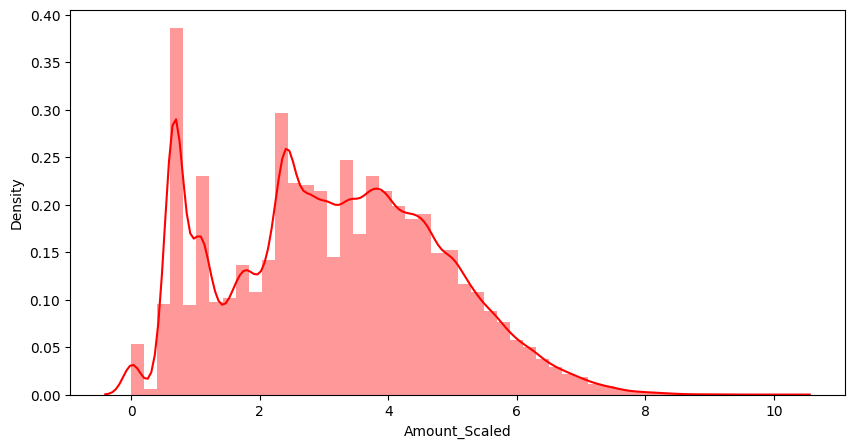

In [36]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data_copy['Amount_Scaled'], color='r')

plt.show()

### 성능 확인

In [37]:
train_dt, test_dt, train_lb, test_lb = train_test_split(raw_data_copy, y, test_size=0.3,
                                                        random_state=13, stratify=y)

start_time = time.time()
results = get_result_pd(models, model_names, train_dt, train_lb, test_dt, test_lb)

print('fittime: ', time.time() - start_time)
results

fittime:  60.90047478675842


,accuracy,precision,recall,f1,roc_auc
lr,0.999169,0.888889,0.594595,0.712551,0.797233
dt,0.999345,0.883333,0.716216,0.791045,0.858026
rf,0.999427,0.915966,0.736486,0.816479,0.868185


In [39]:
models

[LogisticRegression(random_state=13, solver='liblinear'),
 DecisionTreeClassifier(max_depth=4, random_state=13),
 RandomForestClassifier(n_jobs=-1, random_state=13)]

In [40]:
model_names

['lr', 'dt', 'rf']

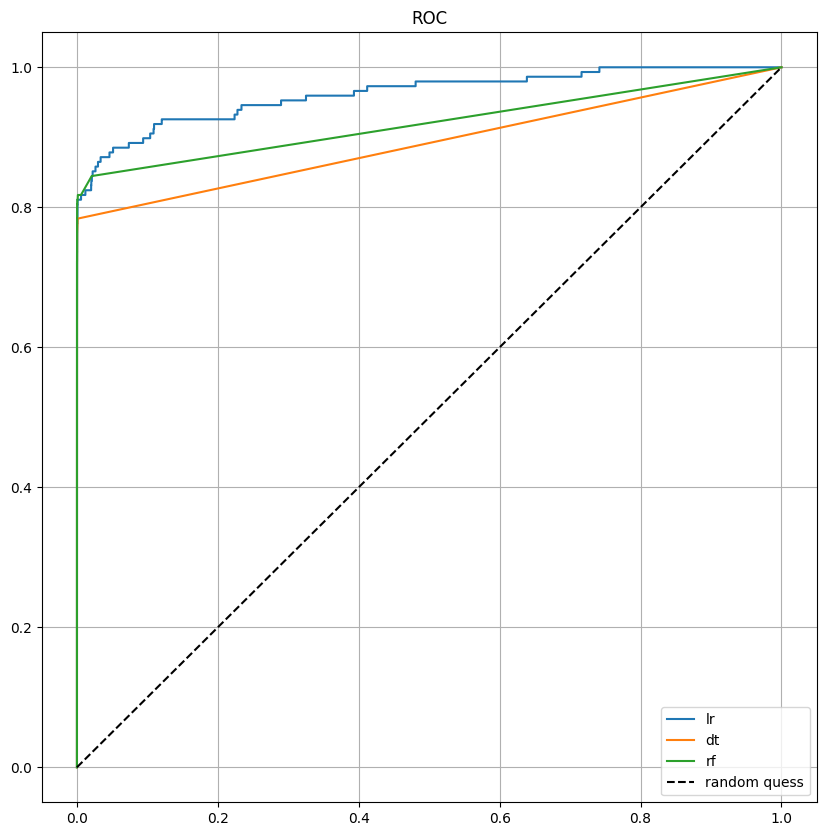

In [38]:
draw_roc_curve(models, model_names, test_dt, test_lb)

### 3rd trial

/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


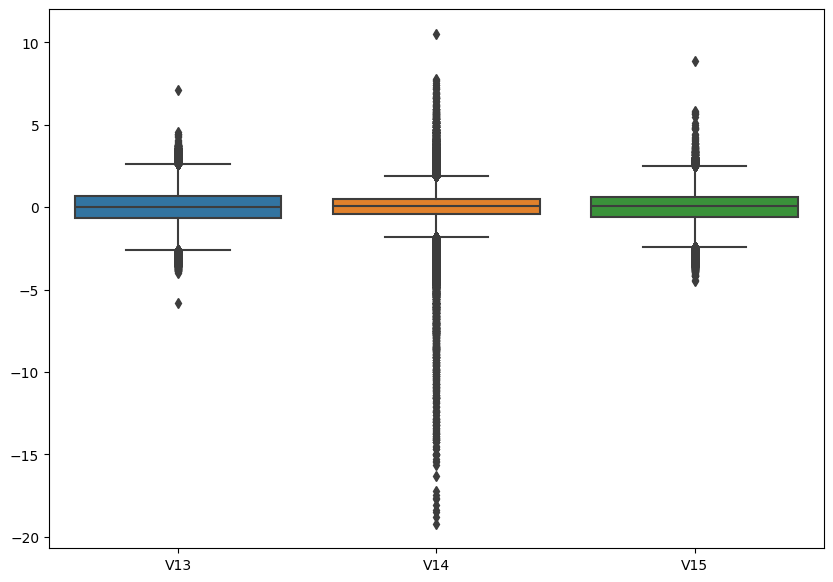

In [42]:
import seaborn as sns

plt.figure(figsize=(10,7))
sns.boxplot(data=raw_data[['V13', 'V14', 'V15']]);

### outlier를 정리하기 위해 Outlier의 인덱스를 파악하는 코드 

In [43]:
def get_outlier(df=None, column=None, weight=1.5):

    fraud = df[df['Class'] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

In [44]:
get_outlier(df=raw_data, column='V14', weight=1.5)

Index([8296, 8615, 9035, 9252], dtype='int64')

### outlier 제거

In [45]:
raw_data_copy.shape

(284807, 30)

In [46]:
outlier_index = get_outlier(df=raw_data, column='V14', weight=1.5)
raw_data_copy.drop(outlier_index, axis=0, inplace=True)
raw_data_copy.shape

(284803, 30)

In [47]:
x = raw_data_copy

raw_data.drop(outlier_index, axis=0, inplace=True)
y = raw_data.iloc[:, -1]

train_dt, test_dt, train_lb, test_lb = train_test_split(x, y, test_size=0.3,
                                                        random_state=13, stratify=y)

In [48]:
models = [lr_clf, dt_clf, rf_clf]
model_names = ['lr', 'dt', 'rf']

start_time = time.time()
results = get_result_pd(models, model_names, train_dt, train_lb, test_dt, test_lb)

print('ft time' , time.time() - start_time)
results

ft time 68.90709590911865


,accuracy,precision,recall,f1,roc_auc
lr,0.999286,0.904762,0.650685,0.756972,0.825284
dt,0.999427,0.870229,0.780822,0.823105,0.890311
rf,0.999520,0.926829,0.780822,0.847584,0.890358


LogisticRegression(random_state=13, solver='liblinear') lr
DecisionTreeClassifier(max_depth=4, random_state=13) dt
RandomForestClassifier(n_jobs=-1, random_state=13) rf


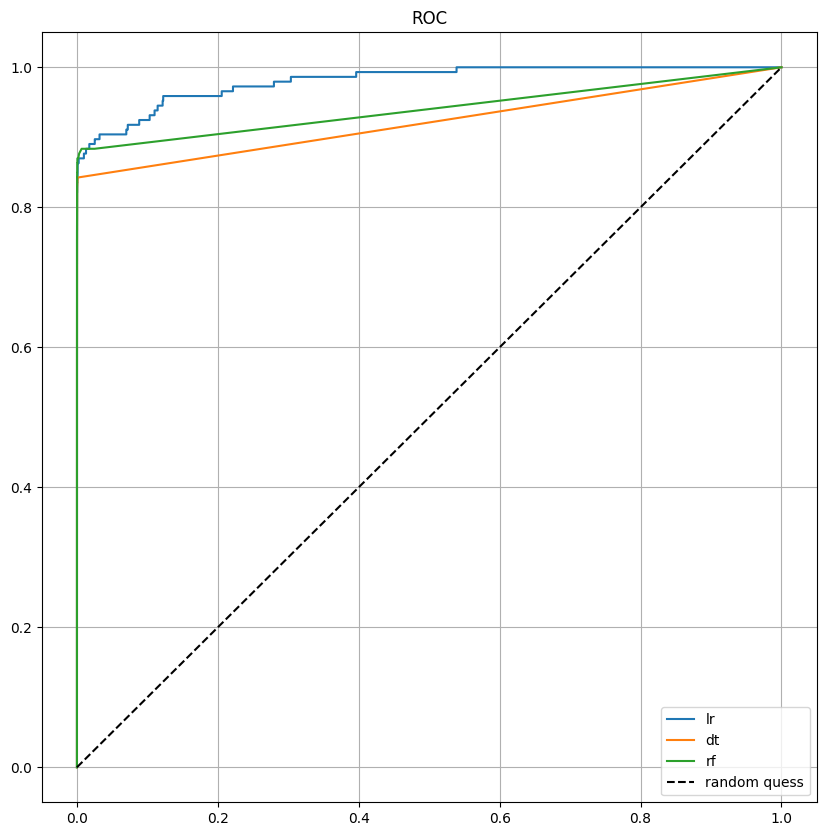

In [49]:
draw_roc_curve(models, model_names, test_dt, test_lb)

### smote oversampling

- 데이터가 없을시 KNN 알고리즘을 활용하여 데이터가 없는 부분에
- 데이터를 만들어줌

In [51]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)

In [52]:
train_dt_over, train_lb_over = smote.fit_resample(train_dt, train_lb)

### 데이터 증강효과

In [53]:
train_dt.shape, train_lb.shape

((199362, 30), (199362,))

In [54]:
train_dt_over.shape, train_lb_over.shape

((398040, 30), (398040,))

In [55]:
print(np.unique(train_lb, return_counts=True))
print(np.unique(train_lb_over, return_counts=True))

(array([0, 1]), array([199020,    342]))
(array([0, 1]), array([199020, 199020]))


### 다시 학습

In [57]:
models = [lr_clf, dt_clf, rf_clf]
model_names = ['lr', 'dt', 'rf']

start_time = time.time()
results = get_result_pd(models, model_names, train_dt_over, train_lb_over, test_dt, test_lb)

print("fit time ", time.time() - start_time)
results

fit time  125.81646513938904


,accuracy,precision,recall,f1,roc_auc
lr,0.975445,0.059169,0.897260,0.111017,0.936420
dt,0.978441,0.064234,0.856164,0.119503,0.917407
rf,0.999520,0.877698,0.835616,0.856140,0.917709


### roc 커브

LogisticRegression(random_state=13, solver='liblinear') lr
DecisionTreeClassifier(max_depth=4, random_state=13) dt
RandomForestClassifier(n_jobs=-1, random_state=13) rf


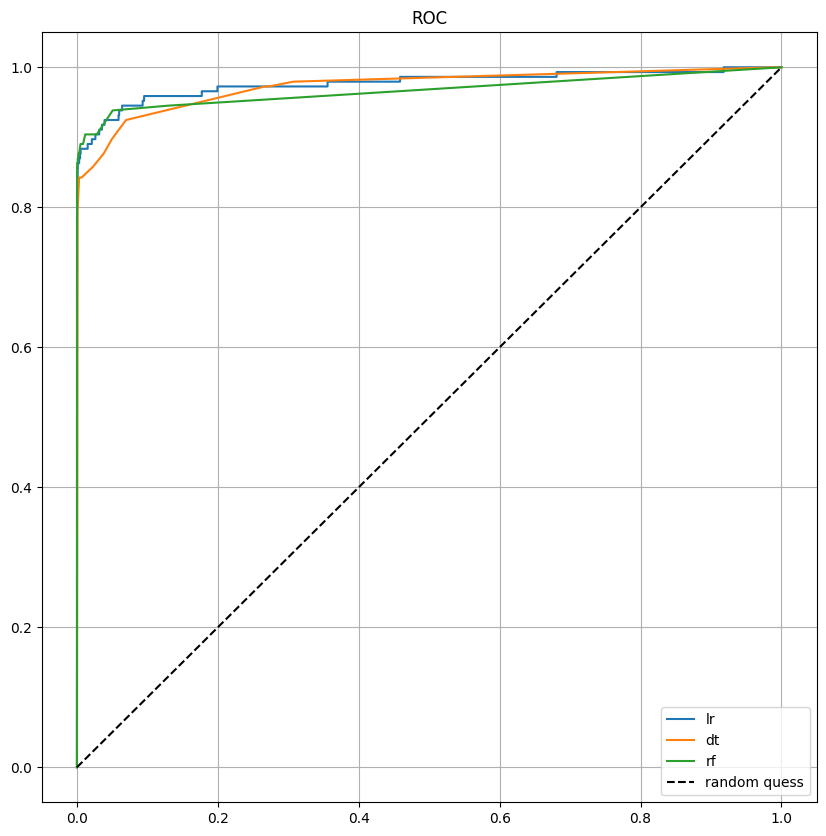

In [58]:
draw_roc_curve(models, model_names, test_dt, test_lb)